In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [21]:
file = 'C:/Users/Gerardo/Desktop/diplomado/modulo-IV/proyecto-final/proyecto/mpg_2.csv'

In [22]:
df = pd.read_csv(file)
df.head()
all_variables = ['displ', 'cyl', 'cty', 'hwy', 'class']
features = ['displ', 'cyl', 'cty', 'hwy']
target = ['class']

In [23]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_sc = pd.DataFrame(scaler.fit_transform(df[features]),
                 columns=features)
df_sc.head()

,displ,cyl,cty,hwy
0,0.037037,0.0,0.346154,0.53125
1,0.037037,0.0,0.461538,0.53125
2,0.074074,0.0,0.423077,0.59375
3,0.074074,0.0,0.461538,0.56250
4,0.222222,0.5,0.269231,0.43750


In [24]:
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df[features]),
                     columns=features)
df_pca.head()

,displ,cyl,cty,hwy
0,5.631533,0.081367,-2.617755,-0.054867
1,7.318569,-0.858017,-0.323461,-0.142522
2,8.320189,0.465476,-1.816669,0.092964
3,8.086548,-0.303206,-0.654055,0.039416
4,1.629201,1.176084,-1.859125,-0.510292


In [25]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.95466568, 0.02839717, 0.01451905, 0.00241809])

In [26]:
df_pca['target'] = df[target]
df_pca.columns = ['PC1', 'PC2','PC3','PC4','target']
df_pca.head()

,PC1,PC2,PC3,PC4,target
0,5.631533,0.081367,-2.617755,-0.054867,compact
1,7.318569,-0.858017,-0.323461,-0.142522,compact
2,8.320189,0.465476,-1.816669,0.092964,compact
3,8.086548,-0.303206,-0.654055,0.039416,compact
4,1.629201,1.176084,-1.859125,-0.510292,compact


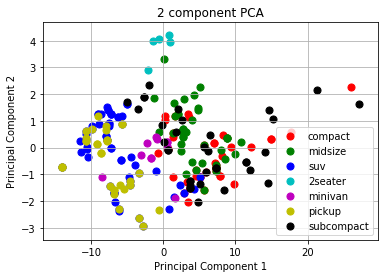

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1') 
ax.set_ylabel('Principal Component 2') 
ax.set_title('2 component PCA') 
targets = ['compact',
'midsize',
'suv',
'2seater',
'minivan',
'pickup',
'subcompact'
]
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

for target, color in zip(targets,colors):
    indicesToKeep = df_pca['target'] == target
    ax.scatter(df_pca.loc[indicesToKeep, 'PC1']
    , df_pca.loc[indicesToKeep, 'PC2']
    , c = color
    , s = 50)
ax.legend(targets)
ax.grid()

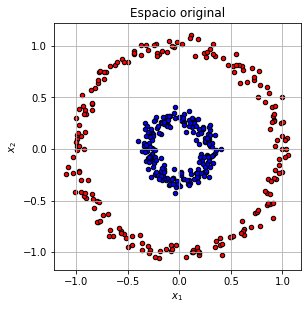

In [30]:
np.random.seed(0)
X, y = make_circles(n_samples=400, factor=.3, noise=.05)

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1, aspect='equal')
plt.title("Espacio original")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()

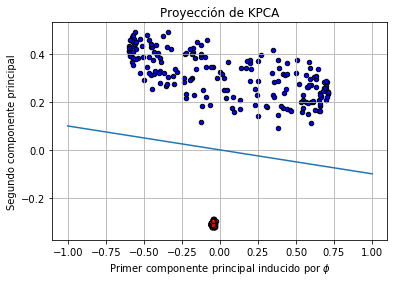

In [32]:
kpca = KernelPCA(kernel = "rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X)

plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",s=20, edgecolor='k')
x = np.linspace(-1, 1, 1000)
plt.plot(x, -0.1*x, linestyle="solid")
plt.title("Proyección de KPCA")
plt.xlabel("Primer componente principal inducido por $\phi$")
plt.ylabel("Segundo componente principal")
plt.grid()